Using 30 ordered random colors


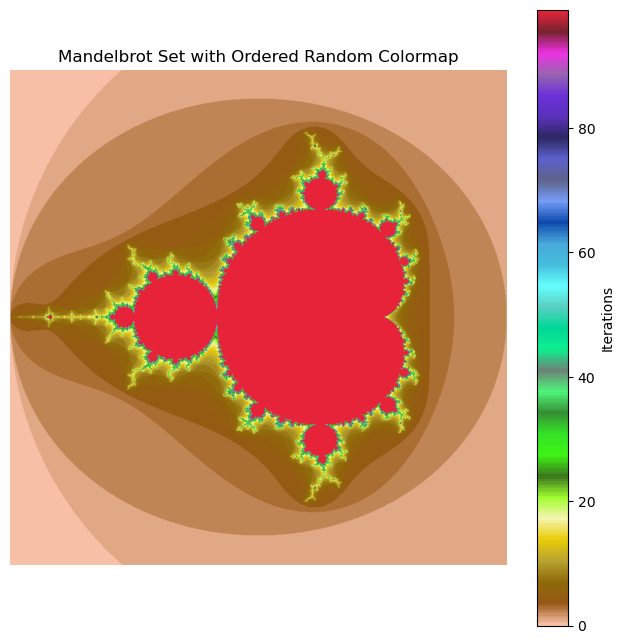

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import random
import colorsys

# Parameters for random color generation
min_colors = 30
max_colors = 30

def generate_ordered_random_colors(min_c, max_c):
    n_colors = random.randint(min_c, max_c)
    print(f"Using {n_colors} ordered random colors")

    # Generate random RGB and convert to HSL
    random_rgbs = [(random.random(), random.random(), random.random()) for _ in range(n_colors)]
    random_hsl = [colorsys.rgb_to_hls(*rgb) for rgb in random_rgbs]

    # Sort by hue (H in HSL)
    sorted_hsl = sorted(random_hsl, key=lambda hsl: hsl[0])

    # Convert back to RGB
    sorted_rgb = [colorsys.hls_to_rgb(*hsl) for hsl in sorted_hsl]
    return sorted_rgb

# Create an ordered random colormap
ordered_colors = generate_ordered_random_colors(min_colors, max_colors)
ordered_cmap = LinearSegmentedColormap.from_list("ordered_cmap", ordered_colors, N=256)

# Mandelbrot function
def mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    C = x[:, np.newaxis] + 1j * y[np.newaxis, :]
    Z = np.zeros_like(C)
    output = np.zeros(C.shape, dtype=int)

    for i in range(max_iter):
        mask = np.abs(Z) < 2
        Z[mask] = Z[mask]**2 + C[mask]
        output[mask] = i
    return output

# Generate fractal data
data = mandelbrot(-2, 1, -1.5, 1.5, 800, 800, 100)

# Plot the fractal with the ordered colormap
plt.figure(figsize=(8, 8))
im = plt.imshow(data.T, cmap=ordered_cmap, extent=(-2, 1, -1.5, 1.5), origin='lower')
plt.colorbar(im, label="Iterations")
plt.title("Mandelbrot Set with Ordered Random Colormap")
plt.axis('off')
plt.show()
